In [1]:
# Was there any effect on the Delivery Service and in-restaurant dining industries during Covid? What were they?

# We started by investigating the overall trends in the food delivery services from 2015-2020. We used Business of Apps data to calculate the YoY percentage change in revenue and users. We saw a significant change in the percentage change of users from 2019 to 2020. We also found an increase in percentage change from 2019 to 2020 in revenue, however it was not as big of an increase in percentage change as from 2018-2019. 

# We then wanted to see if the individual company trends were the same during 2020. Did we see fluctuations in their popularity at our important dates, Mar 2020- restaurants decrease and delivery increase, May 2020- rebound of restaurants and decrease of food service, and late July 2020 approx covid maximum? We found that the trends were what we expected using Google Trends data on the search terms: "DoorDash," "Postmates," "Grubhub," "UberEats." We found an unsusual spike in DoorDash in December and found this to be irrelevant to our data. The DoorDash IPO was Dec 7, 2020 and can be attributed for the spike.

# We then used OpenTable's data to investigate in-restaurant dining. We were given the percentage change YoY of diners (people sitting down to eat) in OpenTable's database of restaurants. We then took these % YoY change per day and converted them into monthy averages and plotted the data with our important dates as vertical lines. From February on, the data shows a decrease YoY in diners. We saw that along our important dates the trends were as we suspected. March 2020 - Apr 2020 saw the largest % decrease in diners, May 2020 was the beginning of the rebound and end of July saw a slight increase in the percentage year over year when the approximate second maximum hospitalizations was taking place.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from matplotlib import figure
import matplotlib.lines as mlines

In [3]:
# Create File Path to all of the DS Data

ds2020_path = "Resources/2020_ds_search.csv"
biz_path = "Resources/BizOfApps_FoodDeliveryData.xlsx"


#ds_search_df means Delivery Service Search Dataframe

ds_2020_df = pd.read_csv(ds2020_path)
ds_rev_df = pd.read_excel(biz_path, sheet_name="Overall US Stats", engine="openpyxl")


ds_rev_df

,Year,US Food Delivery App Users (millions,US Food Delivery Revenue ($ billions)
0,2015,66,8.7
1,2016,75,10.4
2,2017,81,13.7
3,2018,88,16.8
4,2019,95,22.0
5,2020,111,26.5


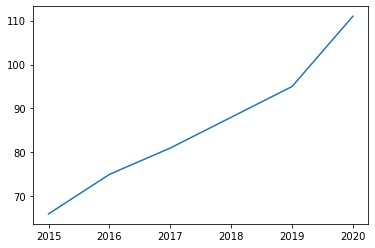

In [4]:
plt.plot(ds_rev_df["Year"], ds_rev_df["US Food Delivery App Users (millions"])

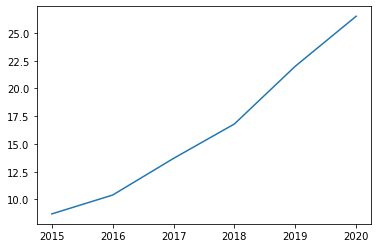

In [5]:
plt.plot(ds_rev_df["Year"], ds_rev_df["US Food Delivery Revenue ($ billions)"])

In [6]:
# Solving for the percentage change YoY in Users

users = 66
user_change = []
for x in ds_rev_df["US Food Delivery App Users (millions"]:
    if x == 66:
        user_change.append("NA")
    else:
        change = ((x - users)/(x))
        user_change.append(round(change*100, 2))
        
ds_rev_df["Y/Y % change in Users"] = user_change    
ds_rev_df

,Year,US Food Delivery App Users (millions,US Food Delivery Revenue ($ billions),Y/Y % change in Users
0,2015,66,8.7,NA
1,2016,75,10.4,12
2,2017,81,13.7,18.52
3,2018,88,16.8,25
4,2019,95,22.0,30.53
5,2020,111,26.5,40.54


In [7]:
# Solving for the percentage change YoY in Revenue
rev = 8.7
rev_change = []
for x in ds_rev_df["US Food Delivery Revenue ($ billions)"]:
    if x == 8.7:
        rev_change.append("NA")
    else:
        change = ((x - rev)/(x))
        rev_change.append(round(change*100, 2))
        
ds_rev_df["Y/Y % change in Revenue"] = rev_change
ds_rev_df

,Year,US Food Delivery App Users (millions,US Food Delivery Revenue ($ billions),Y/Y % change in Users,Y/Y % change in Revenue
0,2015,66,8.7,NA,NA
1,2016,75,10.4,12,16.35
2,2017,81,13.7,18.52,36.5
3,2018,88,16.8,25,48.21
4,2019,95,22.0,30.53,60.45
5,2020,111,26.5,40.54,67.17


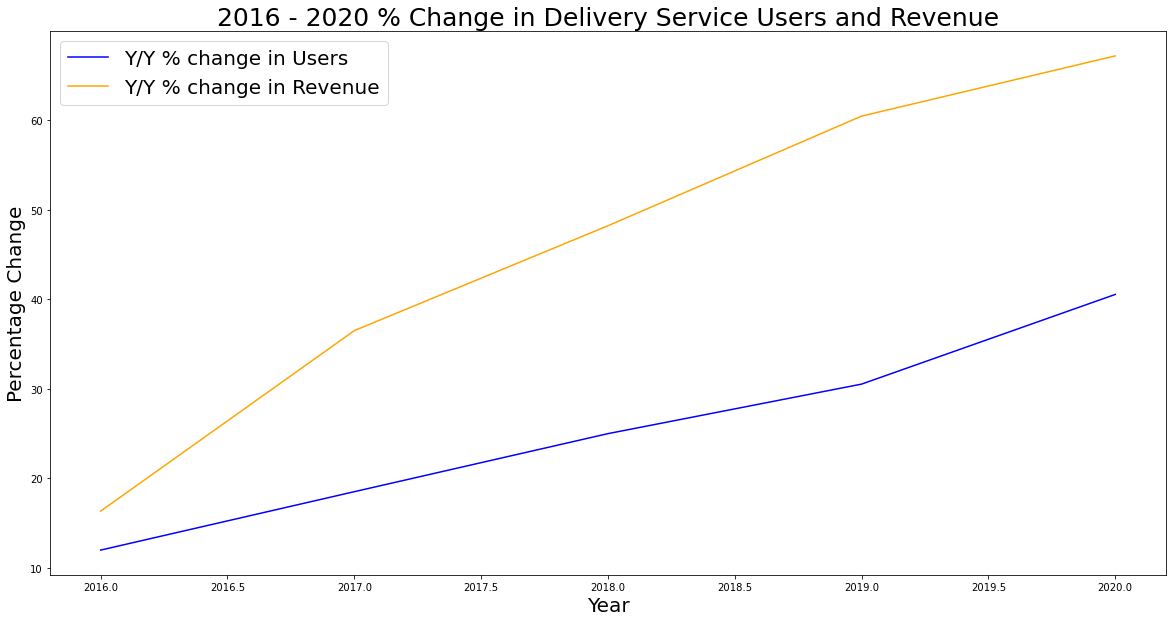

In [8]:
# Plotting the overall change in users and revenue in delivery services from Buiness of Apps

plt.figure(figsize=(20,10))

# Creating proxys for the legend

blue_line = mlines.Line2D([], [], color="blue", label="Y/Y % change in Users")
orange_line = mlines.Line2D([], [], color="orange", label="Y/Y % change in Revenue")

line1 = plt.plot(ds_rev_df["Year"].iloc[1:].astype(int), ds_rev_df["Y/Y % change in Users"].iloc[1:], label="Y/Y % change in Users", color="blue")
line2 = plt.plot(ds_rev_df["Year"].iloc[1:].astype(int), ds_rev_df["Y/Y % change in Revenue"].iloc[1:], label="Y/Y % change in Revenue", color="orange")

plt.title("2016 - 2020 % Change in Delivery Service Users and Revenue",fontsize=25)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Percentage Change", fontsize=20)

plt.legend(handles = [blue_line, orange_line], fontsize=20)

plt.savefig("Images/2016-2020_YoY%_Rev_Users.png")
plt.show()

In [10]:
# Preview the Dataframe
ds_2020_df.head()

,Week,Postmates: (United States),Uber Eats: (United States),DoorDash: (United States),Grubhub: (United States)
0,1/26/2020,14,20,42,24
1,2/2/2020,14,21,42,26
2,2/9/2020,15,22,44,27
3,2/16/2020,14,21,42,26
4,2/23/2020,14,21,44,28


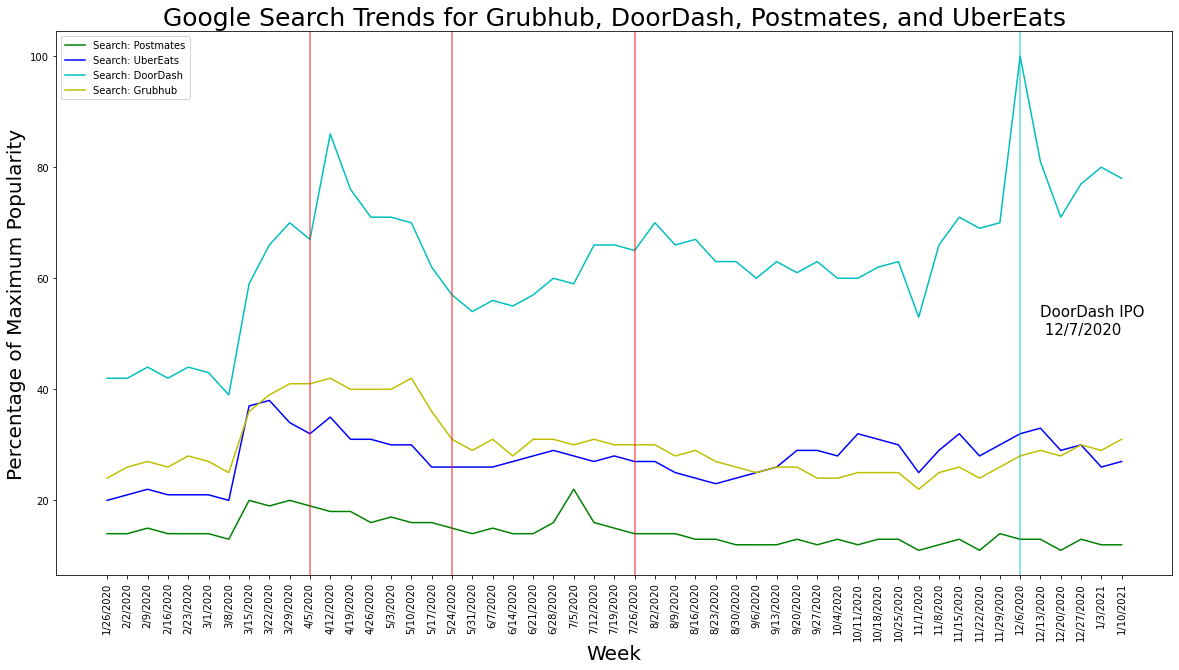

In [11]:
# Plotting the popularity of the search trends in the individual companies, vertical lines plotting the important dates

plt.figure(figsize=(20, 10))
postmates_handle = plt.plot(ds_2020_df["Week"], ds_2020_df["Postmates: (United States)"], "g", label="Search: Postmates")
ubereats_handle = plt.plot(ds_2020_df["Week"], ds_2020_df["Uber Eats: (United States)"], "b", label="Search: UberEats")
doordash_handle = plt.plot(ds_2020_df["Week"], ds_2020_df["DoorDash: (United States)"], "c", label="Search: DoorDash")
grubhub_handle = plt.plot(ds_2020_df["Week"], ds_2020_df["Grubhub: (United States)"], "y", label="Search: Grubhub")

plt.title("Google Search Trends for Grubhub, DoorDash, Postmates, and UberEats", fontsize=25)
plt.xlabel("Week", fontsize=20)
plt.ylabel("Percentage of Maximum Popularity", fontsize=20)

plt.legend(loc="upper left")

plt.axvline("4/5/2020", color="red", alpha=0.6)
plt.axvline("5/24/2020", color="red", alpha=0.6)
plt.axvline("7/26/2020", color="red", alpha=0.6)
plt.axvline("12/6/2020", color="c", alpha=0.6)

plt.annotate("DoorDash IPO \n 12/7/2020", ("12/13/2020", 50), fontsize=15, color="black")

plt.xticks(rotation=90)
plt.savefig("Images/DS2020_search_trends.png")
plt.show()

In [12]:
# Create pathway to OpenTable Data
open_table_file = "Resources/YoY_Seated_Diner_Data.csv"

In [13]:
# Read in OpenTable data into DF
open_table_df = pd.read_csv(open_table_file)

In [14]:
# Preview the data
open_table_df.head(30)

,Type,Name,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,...,15-Jan,16-Jan,17-Jan,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,23-Jan,24-Jan
0,country,Global,-1.0,3.0,-1.0,-2.0,1.0,4.0,1.0,1.0,...,-55.95,-50.85,-55.23,-61.42,-67.82,-66.92,-63.67,-56.56,-53.14,-61.57
1,country,Australia,-3.0,-6.0,-3.0,-1.0,0.0,0.0,0.0,-2.0,...,71.14,74.71,72.60,51.47,40.97,61.67,65.16,66.43,81.80,75.35
2,country,Canada,-5.0,0.0,-3.0,-2.0,-1.0,8.0,-2.0,-3.0,...,-82.32,-77.61,-78.97,-83.95,-85.06,-86.01,-85.79,-82.62,-80.12,-84.04
3,country,Germany,11.0,4.0,3.0,5.0,1.0,2.0,11.0,4.0,...,-99.24,-99.01,-99.55,-99.69,-99.84,-99.69,-99.38,-99.38,-99.18,-99.53
4,country,Ireland,2.0,0.0,4.0,1.0,-3.0,4.0,-9.0,-8.0,...,-99.82,-99.66,-99.95,-99.83,-98.96,-99.98,-99.97,-99.97,-99.90,-99.84
5,country,Mexico,-5.0,-5.0,-4.0,-3.0,-1.0,2.0,-1.0,-3.0,...,-62.48,-61.33,-66.22,-55.79,-63.44,-65.75,-63.84,-62.83,-58.45,-66.31
6,country,United Kingdom,1.0,-1.0,-2.0,0.0,-1.0,-4.0,-6.0,-5.0,...,-99.34,-99.28,-99.65,-99.81,-99.73,-99.70,-99.76,-99.56,-99.45,-99.76
7,country,United States,0.0,4.0,0.0,-1.0,2.0,6.0,2.0,2.0,...,-52.24,-46.80,-51.80,-59.00,-65.52,-64.74,-61.02,-52.57,-48.99,-59.06
8,state,Alabama,-14.0,7.0,1.0,-2.0,8.0,2.0,1.0,0.0,...,-24.18,-14.28,-19.01,-28.99,-48.80,-41.29,-39.72,-30.71,-24.14,-29.02
9,state,Arizona,0.0,1.0,8.0,4.0,-3.0,5.0,2.0,5.0,...,-32.28,-27.39,-30.36,-35.55,-48.06,-44.68,-41.32,-29.21,-29.52,-50.59


In [15]:
# Separate US restaurants
us_diner_df = open_table_df.loc[open_table_df["Name"] == "United States"]

In [16]:
# Drop unneccessaryf columns
us_diner_df = us_diner_df.drop(columns=["Type", "Name"]).reset_index(drop=True)
us_diner_df.head()

,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,...,15-Jan,16-Jan,17-Jan,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,23-Jan,24-Jan
0,0.0,4.0,0.0,-1.0,2.0,6.0,2.0,2.0,-1.0,-1.0,...,-52.24,-46.8,-51.8,-59.0,-65.52,-64.74,-61.02,-52.57,-48.99,-59.06


In [17]:
# Creating new DF with daily dates removed. 
# Setting up the data to get the average change for the month
dates = us_diner_df.columns.tolist()
change = us_diner_df.iloc[0]
month_list = []
for x in dates:
    month = x[-3:]
    month_list.append(month)
us_daily_df = pd.DataFrame({"Month": month_list, "Change YoY": change})
us_daily_df = us_daily_df.reset_index(drop=True)
us_daily_df.head()

,Month,Change YoY
0,Feb,0.0
1,Feb,4.0
2,Feb,0.0
3,Feb,-1.0
4,Feb,2.0


In [18]:
# Check the list for correct titles of months
print(us_daily_df["Month"].unique())

['Feb' '-29' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec'
 'Jan']


In [19]:
# Removing the 29th of February
clean_monthly = us_daily_df.loc[us_daily_df["Month"] != "-29"]
print(len(clean_monthly), len(us_daily_df))

341 342


In [20]:
# Calculate the average change for each month and create a list with that data
# Make sure the month_uni and avg_list line up

feb_avg = us_daily_df.loc[us_daily_df["Month"] == "Feb"]["Change YoY"].mean()
mar_avg = us_daily_df.loc[us_daily_df["Month"] == "Mar"]["Change YoY"].mean()
apr_avg = us_daily_df.loc[us_daily_df["Month"] == "Apr"]["Change YoY"].mean()
may_avg = us_daily_df.loc[us_daily_df["Month"] == "May"]["Change YoY"].mean()
jun_avg = us_daily_df.loc[us_daily_df["Month"] == "Jun"]["Change YoY"].mean()
jul_avg = us_daily_df.loc[us_daily_df["Month"] == "Jul"]["Change YoY"].mean()
aug_avg = us_daily_df.loc[us_daily_df["Month"] == "Aug"]["Change YoY"].mean()
sep_avg = us_daily_df.loc[us_daily_df["Month"] == "Sep"]["Change YoY"].mean()
oct_avg = us_daily_df.loc[us_daily_df["Month"] == "Oct"]["Change YoY"].mean()
nov_avg = us_daily_df.loc[us_daily_df["Month"] == "Nov"]["Change YoY"].mean()
dec_avg = us_daily_df.loc[us_daily_df["Month"] == "Dec"]["Change YoY"].mean()
jan_avg = us_daily_df.loc[us_daily_df["Month"] == "Jan"]["Change YoY"].mean()

avg_list = [feb_avg, mar_avg, apr_avg, may_avg, jun_avg, jul_avg, aug_avg, sep_avg, oct_avg, nov_avg, dec_avg, jan_avg]

month_uni = clean_monthly["Month"].unique()

print(month_uni, avg_list)

['Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan'] [1.2727272727272727, -57.01806451612904, -99.96799999999999, -92.20774193548388, -67.857, -61.30483870967741, -52.266451612903225, -41.40433333333335, -41.01451612903225, -51.57699999999999, -62.038064516129026, -58.06333333333333]


In [21]:
# Adding the year to the list of months

month_year = []
for x in month_uni:
    if x != "Jan":
        month_year.append(f"{x} 2020")
    else:
        month_year.append(f"{x} 2021")
        
# Creating final dataframe that contains only the mont-year and the average percentage change
        
        monthly_change_df = pd.DataFrame({"Month": month_year, "Average Daily YoY Change": avg_list})
monthly_change_df

,Month,Average Daily YoY Change
0,Feb 2020,1.272727
1,Mar 2020,-57.018065
2,Apr 2020,-99.968000
3,May 2020,-92.207742
4,Jun 2020,-67.857000
5,Jul 2020,-61.304839
6,Aug 2020,-52.266452
7,Sep 2020,-41.404333
8,Oct 2020,-41.014516
9,Nov 2020,-51.577000


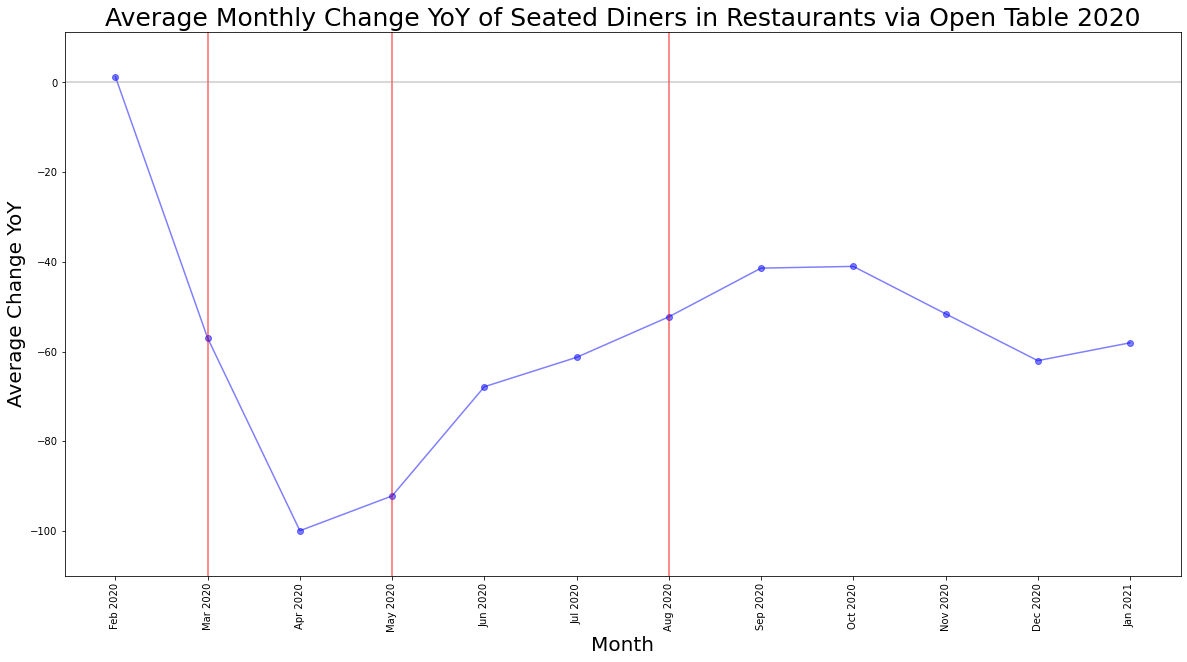

In [22]:
# Plotting the average monthly change of seated diners over 2020


x_axis = np.arange(len(monthly_change_df))
monthly_change = monthly_change_df["Average Daily YoY Change"]
plt.figure(figsize=(20,10))
plt.plot(month_year, monthly_change, marker="o", alpha=.5, color="blue")
plt.xticks(rotation=90)
plt.ylim(min(monthly_change)-10, max(monthly_change)+10)

plt.title("Average Monthly Change YoY of Seated Diners in Restaurants via Open Table 2020", fontsize=25)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Average Change YoY", fontsize=20)

#Adding in our important dates as vertical lines.

plt.axvline("Mar 2020", color="red", alpha=0.6)
plt.axvline("May 2020", color="red", alpha=0.6)
plt.axvline("Aug 2020", color="red", alpha=0.6)
plt.axhline(0, color="grey", alpha=0.4)
plt.savefig("Images/Change_YoY_monthly_avg_opentable")